# CS 498 HW1 Problem 5


In [108]:
import numpy as np
from IPython.display import display, Math
import sympy as sp

def latexPrint(A):
    display(Math(sp.latex(sp.Matrix(A))))
    return sp.latex(sp.Matrix(A))

A = np.array([[1,1],[1,3]])
b = np.array([5, 11])



The active constraint is (1) and (2) since $$\left[\begin{matrix}1 & 1\\1 & 3\end{matrix}\right] \begin{bmatrix}2 \\ 3\end{bmatrix} = \begin{bmatrix}5 \\ 11\end{bmatrix}  $$
This also shows (1),(2),(3),(4) are all set with positivity obvious 


## Possible $c$

> 
> **Definition** Normal Cone 
> Let $\Omega \subset \mathbb{R}^n$ be convex, the normal cone to $\Omega$ at $x$ is defined as:
> $$N_{\Omega}(x)=\{x\in \mathbb{R}^n : \langle x, y-x \rangle\leq 0, \forall y\in \Omega \} $$
> 

For a point $x$ to be a maximizer, we have to have $\nabla f(x)\in N_{\Omega}(x)$,  in our case: 

$$N_{\Omega}(2,3)=\{(2,3)+\alpha(1,1) + \beta(1,3): \alpha,\beta>0\}$$

> **Proposition** Let $A\in \mathbb{R}^{m\times n}, b\in \mathbb{R}^m, x\in \mathbb{R}^n$. Let $\Omega$ be the region given by $Ax \leq b$. Suppose $$Ax\leq b$$ then the *normal cone* of $\Omega$ defines all possible $c\in\mathbb{R}^n$ such that the LP $\Pi=(A,b,c)$ has a solution at $x$

**A simple explanation**: for $x$ to be a maximizer, towards any $v$ we should have $\nabla f \cdot D_vf(x) \leq 0$. If we assume star-convexity, then the resulting possible $c$ is equivalent to the definition of normal cone as above.

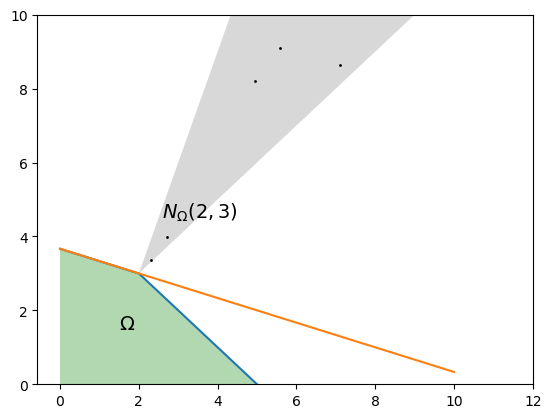

In [109]:
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 500)
f1 = (5 - x)
f2 = (11-x)/3
f =np.where(f1<f2, f1, f2)
fig, ax = plt.subplots()
ax.plot(x, f)
ax.plot(x, f2)
ax.fill_between(x, y1=0, y2=f, facecolor='green', alpha=.3)

g1 = x + 1
g2 = 3*x -3
ax.fill_between(x, g1, g2, where=x>2.0, facecolor='grey', alpha=.3)

plt.text(2.6, 4.5, r'$N_{\Omega}(2,3)$', fontsize=14)
plt.text(1.5, 1.5, r'$\Omega$', fontsize=14)
plt.ylim(0,10)


def random_from_normal_cone(point, lower_bound_func, upper_bound_func, interval_len=10.0, number=10):
    x,y=point
    x_ = x+ interval_len * np.random.rand(number)
    y_ = lower_bound_func(x_) + (upper_bound_func(x_) - lower_bound_func(x_)) * np.random.rand(number)
    return x_, y_
    
number=10
x, y = random_from_normal_cone((2,3), lambda x : x+1, lambda x : 3*x-3, number=number)
for i in range(number):
    ax.plot(x[i],y[i], marker='o', color='black', alpha=1, markersize=1)
plt.show()



Let's check against gurobi:

In [122]:
from hw1_p1_lp import build_model, solve_with_gurobi
cs = np.column_stack([x,y])

x_opts = []
for i in range(number):
    x_opt, _ =solve_with_gurobi(A, b, cs[i])
    x_opts.append(x_opt)

if ((x_opts - np.array([2.,3.])) == 0).all() : 
    print("unit test passed!")
else:
    print(r"there are points in the cone that does not give rise to LP $\Pi$ at (2,3)!")

Gurobi Optimizer version 13.0.1 build v13.0.1rc0 (mac64[arm] - Darwin 24.2.0 24C101)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 2 columns and 4 nonzeros (Max)
Model fingerprint: 0x293dbda6
Model has 2 linear objective coefficients
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [9e+00, 2e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+00, 1e+01]

Presolve time: 0.01s
Presolved: 2 rows, 2 columns, 4 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.0277251e+31   3.000000e+30   3.027725e+01      0s
       2    8.1903712e+01   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds (0.00 work units)
Optimal objective  8.190371222e+01
Gurobi Optimizer version 13.0.1 build v13.0.1rc0 (mac64[arm] - Darwin 24.2.0 24C101)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 